### The Kernel Trick

Many times in the course so far we have transformed our variables to work in a higher dimensional space (e.g. adding polynomial features).

One downside to simply adding polynomial features is that it can create a huge number of variables.

An example is below.  

We begin with a dataset with 8 features, and add degree 5 polynomial features.

This results in a new dataset with over 1000 features.



In [1]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
X = np.random.randn(64).reshape(8,8)
pf = PolynomialFeatures(5)
X = pf.fit_transform(X)
X.shape

(8, 1287)

### Speed and space

One major downside of working with a dataset with a huge number of features is speed.

Another is space.

Either of these restrictions may be prohibitive when working with a large dataset. 

The **kernel trick** allows us to enjoy the benefits of feature transformations without paying the cost.



### The dual problem

For any constrained optimization problem (such as training an SVM) there is an associated optimization problem called the [dual](https://en.wikipedia.org/wiki/Duality_(optimization)).

In the case of a convex optimization problem (such as training an SVM) the dual problem and the original ("primal") problem have the same solutions.

We will skip the technicalities, but we need to see the form of the dual SVM problem to understand the kernel trick.

The notation for the dual is much more suited to the convention that $\bar{w}$ **does not** have the bias weight $b$, and $\bar{x}$ **does not** start with a bias 1. We will use that notation here.  

The dual SVM problem is to minimize the following with respect to $\alpha_1,\alpha_2,\ldots,\alpha_N$ subject to $\alpha_n \geq 0$ for $n=1,2,\ldots,N$.

$$\frac{1}{2}\sum_{i=1}^N\sum_{j=1}^N \alpha_i \alpha_j y_i y_j \bar{x}_i^T\bar{x}_j - \sum_{i=1}^N \alpha_i.$$

Once the solution is known, $\bar{w}$ can be determined by the equations

$$\bar{w} = \sum_{i=1}^N \alpha_i y_i \bar{x}_i$$

$$b = \frac{1}{n_s} \sum_{i=1, \alpha_i > 0}^N (y_i - \bar{w}^T\bar{x}_i)$$

where $n_s$ is the number of support vectors.

(This is the hard margin version -- there is also a soft margin formula.)

### Observation

In order to apply the weights $\bar{w},b$ to an instance $\bar{x}$, we calculate

$$h_{\bar{w},b}(\bar{x}) = \bar{w}^T\bar{x} + b$$

By making substitutions using the above equations, the right hand side can be expressed *entirely in terms of the $\alpha_i$ and the training set $(\bar{x}_1,y_1)\ldots,(\bar{x}_N,y_N)$*.

In fact

$h_{\bar{w},b}(\bar{x}) = \sum_{i=1, \alpha_i > 0}^N \alpha_iy_i\bar{x}_i^T\bar{x} + b$

and $b$ can further be expressed as 

$$b = \frac{1}{n_s} \sum_{i=1, \alpha_i > 0}^N  \left (1 - y_i \sum_{j=1, \alpha_j > 0}^N \alpha_j y_j \bar{x}_i^T\bar{x}_j \right )$$

Putting it together,

$$h_{\bar{w},b}(\bar{x}) = \sum_{i=1, \alpha_i > 0}^N \alpha_iy_i\bar{x}_i^T\bar{x} + \frac{1}{n_s} \sum_{i=1, \alpha_i > 0}^N  \left (1 - y_i \sum_{j=1, \alpha_j > 0}^N \alpha_j y_j \bar{x}_i^T\bar{x}_j \right )$$


---

Now notice that **if** we performed a variable transformation $\bar{z} = \phi(\bar{x})$ (e.g. polynomial features) then the above expression would become

$$h_{\bar{w},b}(\bar{x}) = \sum_{i=1, \alpha_i > 0}^N \alpha_iy_i\phi(\bar{x}_i)^T\phi(\bar{x}) + \frac{1}{n_s} \sum_{i=1, \alpha_i > 0}^N  \left (1 - y_i \sum_{j=1, \alpha_j > 0}^N \alpha_j y_j \phi(\bar{x}_i)^T\phi(\bar{x}_j) \right )$$

### The kernel trick

The kernel trick is the observation that all we really need to be able to do is *dot products* in the higher dimensional space in order to train and evaluate the SVM in the $\mathcal{Z}$-space.  

We do not actually literally have to do the transformation $\bar{x} \mapsto \phi(\bar{x})$, provided we can compute $K(\bar{x}_i,\bar{x}_j) =  \phi(\bar{x}_i)^T\phi(\bar{x}_j)$.


### Example, the polynomial kernel

Consider a two dimensional feature space with two instances $\bar{x} = [x_1,x_2]$ and $\bar{z} = [z_1,z_2]$.  

(Here $\bar{z}$ is not a transformed version of $\bar{x}$, it is just another variable name.)

Now consider the degree 2 polynomial feature transformation defined by

$$\phi(\bar{x}) = [1,\sqrt{2}x_1,\sqrt{2}x_2,\sqrt{2} x_1x_2,x_1^2,x_2^2].$$

With $\bar{z}$ this is 

$$\phi(\bar{z}) = [1,\sqrt{2}z_1,\sqrt{2}z_2,\sqrt{2} z_1z_2,z_1^2,z_2^2].$$


Then

$$\phi(\bar{x})^T\phi(\bar{z}) = 1 + 2x_1z_1+2x_2z_2+2x_1x_2z_1z_2+ x_1^2z_1^2+x_2^2z_2^2.$$

But notice that

$$(1+\bar{x}^T\bar{z})^2 = 1 + 2x_1z_1+2x_2z_2+2x_1x_2z_1z_2+ x_1^2z_1^2+x_2^2z_2^2.$$

In other words,

$$\phi(\bar{x})^T\phi(\bar{z}) = (1+\bar{x}^T\bar{z})^2.$$

Thus, we can compute the dot product without doing the variable transformation!

This is true not just for degree $2$ polynomials, but polynomials of any degree (with appropriate constants).

We call this **the polynomial kernel of degree $k$**

$$K(\bar{x},\bar{z}) = (1+\bar{x}^T\bar{z})^k.$$

The moral is **we can work with polynomial features without paying the cost in time and space.**


A function $K(\bar{x},\bar{z}) = \phi(\bar{x})^T\phi(\bar{z})$ for some variable transformation $\phi(\cdot)$ is called a **kernel**.

The interesting cases are when $K(\bar{x},\bar{z})$ is much easier to compute than $\phi(\bar{x})^T\phi(\bar{z})$ (such as with the polynomial kernel).

With a kernel function we can "virtually" work in the higher dimensional space.

We just use

$$h_{\bar{w},b}(\bar{x}) = \sum_{i=1, \alpha_i > 0}^N \alpha_iy_iK(\bar{x}_i,\bar{x}) + \frac{1}{n_s} \sum_{i=1, \alpha_i > 0}^N  \left (1 - y_i \sum_{j=1, \alpha_j > 0}^N \alpha_j y_j K(\bar{x}_i,\bar{x}_j) \right )$$

rather than

$$h_{\bar{w},b}(\bar{x}) = \sum_{i=1, \alpha_i > 0}^N \alpha_iy_i\phi(\bar{x}_i)^T\phi(\bar{x}) + \frac{1}{n_s} \sum_{i=1, \alpha_i > 0}^N  \left (1 - y_i \sum_{j=1, \alpha_j > 0}^N \alpha_j y_j \phi(\bar{x}_i)^T\phi(\bar{x}_j) \right ).$$

The higher dimensions are never actually explicitly created (assuming the kernel doesn't create them).

### Common kernel functions

The following are some common kernel functions.  

Notice that some of them use additional hyperparameters.

1. *Linear* $K(\bar{x},\bar{z}) = \bar{x}^T\bar{z}$
2. *Polynomial* $K(\bar{x},\bar{z}) = (1+\bar{x}^T\bar{z})^k$ (or the fancier $K(\bar{x},\bar{z}) = (r+\gamma\bar{x}^T\bar{z})^k$).
3. *Gaussian radial basis function* $K(\bar{x},\bar{z}) = \exp(-\gamma |\!| \bar{x}-\bar{z}|\!|^2)$
4. *Sigmoid*  $K(\bar{x},\bar{z}) = \tanh(\gamma\bar{x}^T\bar{z}+r)$

There are other kernels such as [string kernels](https://en.wikipedia.org/wiki/String_kernel).

In serveral cases (Gaussian RBF and Sigmoid) it is not at all obvious what the mapping $\phi(\cdot)$ would be.

Interestingly we don't even need to know $\phi$ -- we just need to know that some such $\phi$ exists.

[**Mercer's Theorem**](https://en.wikipedia.org/wiki/Mercer%27s_theorem) gives conditions under which $K(\bar{x},\bar{z})$ will be a kernel for some $\phi(\bar{x})$.

These include a few very general conditions like continuity, and symmetry.

One sufficient condition is to check that the matrix $A$ with entries $a_{i,j} = K(\bar{x}_i,\bar{x}_j)$ is positive semidefinite  ($\forall \bar{v}$, $\bar{v}^TA\bar{v} \geq 0$).

### Using the kernels

We will not implement SVMs capable of the kernel trick (though it's a good exercise to think about how to translate the dual problem into QP).

We can use them through the sklearn library. 





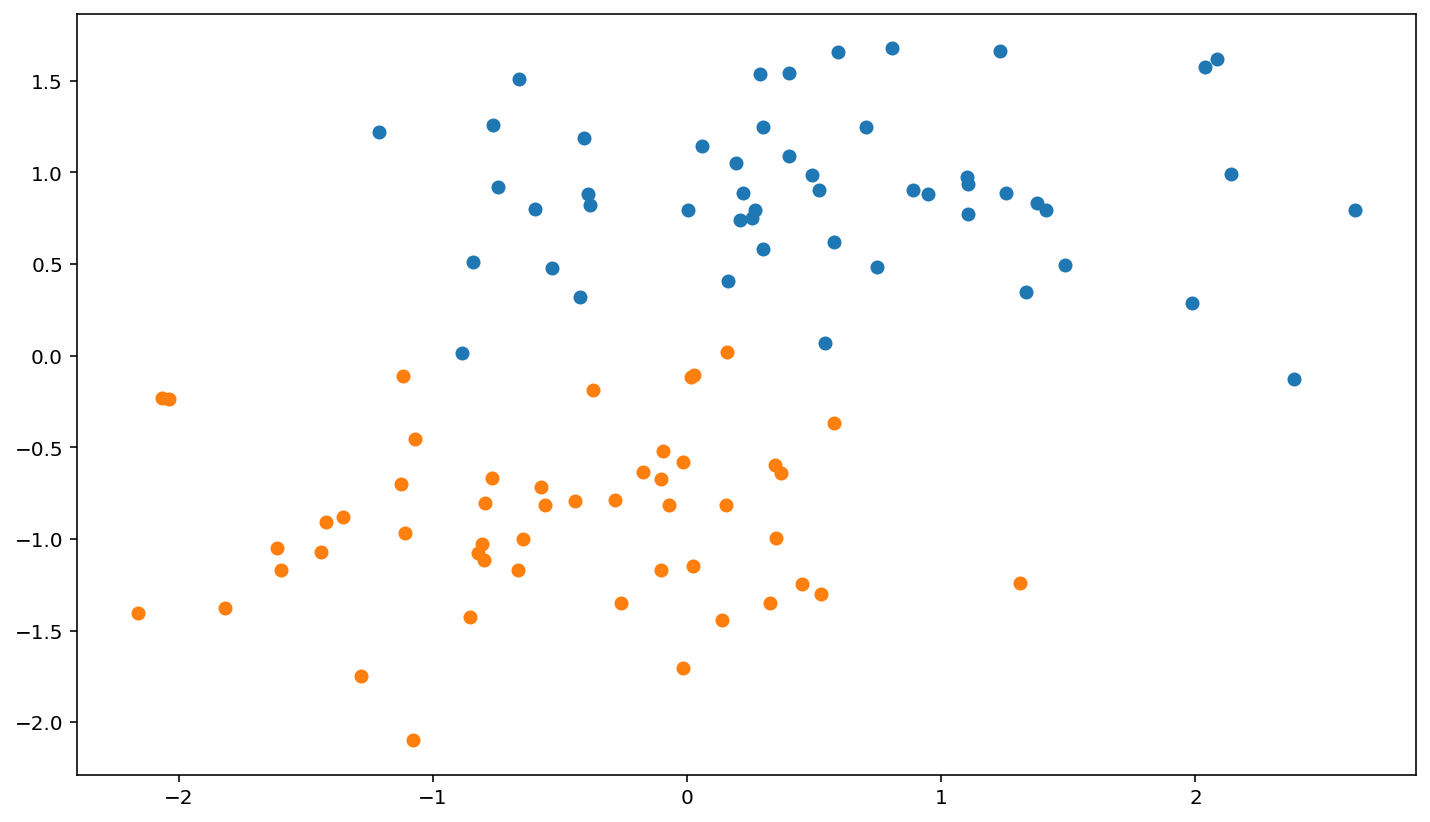

In [2]:
from sklearn.datasets import make_blobs
#import numpy as np
#import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler

X,y = make_blobs(centers=2,cluster_std = 4,random_state=11)
ss = StandardScaler()
X = ss.fit_transform(X)
y = 2*y-1
Xr = X[y==1]
Xb = X[y==-1]
plt.scatter(Xr[:,0],Xr[:,1])
plt.scatter(Xb[:,0],Xb[:,1])
plt.show()

In [3]:
from sklearn.svm import SVC

## Code from here: https://stackoverflow.com/questions/51495819/how-to-plot-svm-decision-boundary-in-sklearn-python

def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

#model = svm.SVC(kernel='linear')

def plot_model(clf,X):
    fig, ax = plt.subplots()
    # title for the plots
    title = ""
    #title = ('Decision surface of linear SVC ')
    # Set-up grid for plotting.
    X0, X1 = X[:, 0], X[:, 1]
    xx, yy = make_meshgrid(X0, X1)

    plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    #ax.set_ylabel('y label here')
    #ax.set_xlabel('x label here')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)
    #ax.legend()
    plt.show()

    

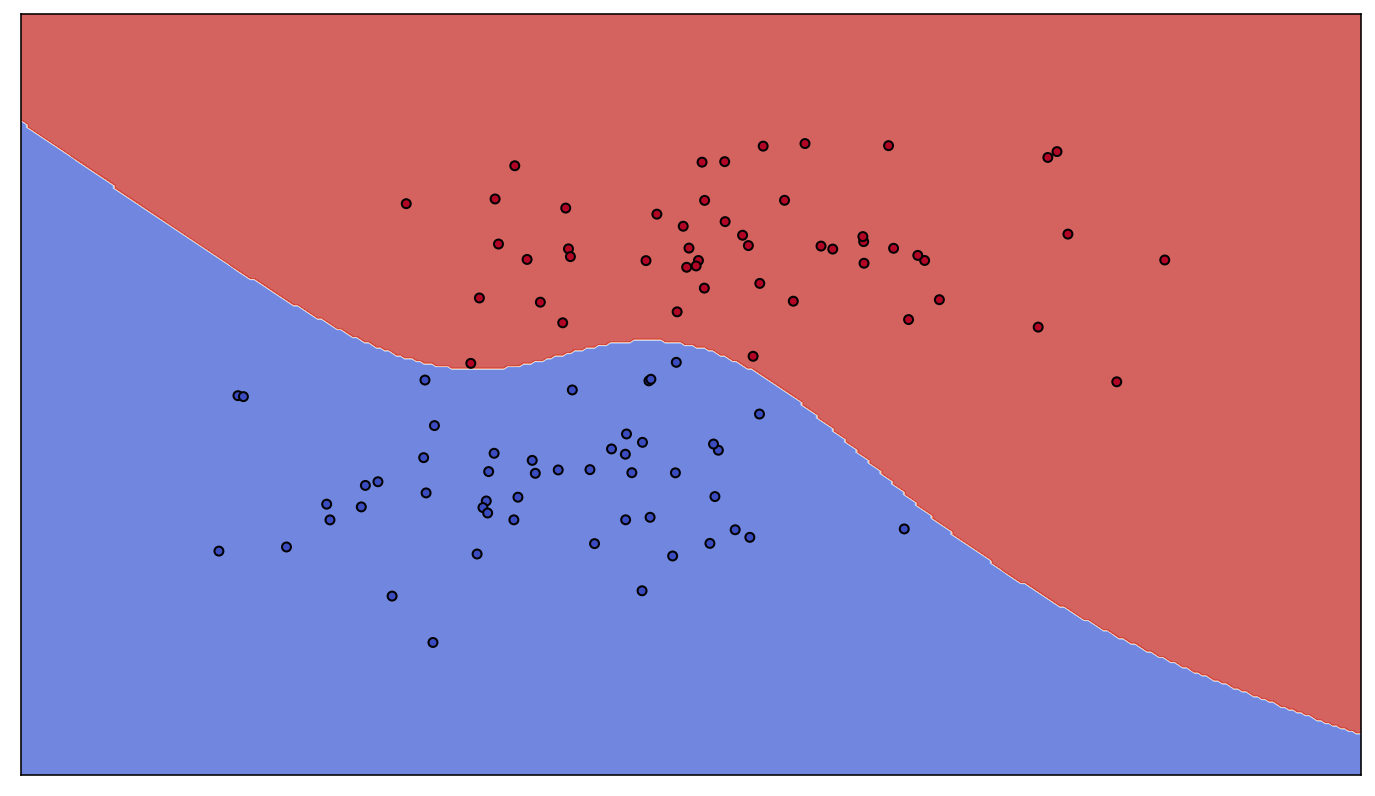

In [4]:
model = SVC(kernel="poly", degree=7, coef0 = 1)  #coef0 = r

clf = model.fit(X, y)
plot_model(clf,X)    


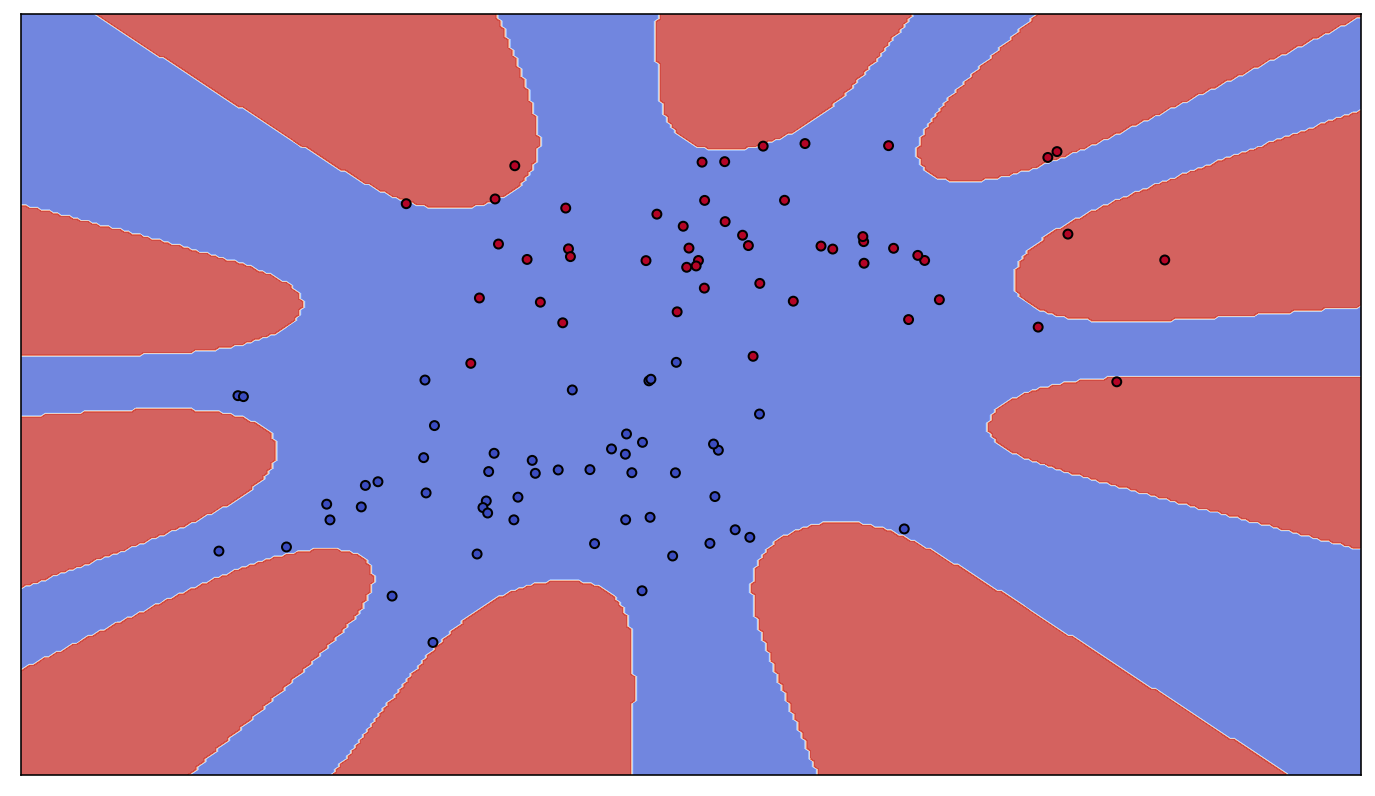

In [5]:
## Yes, this model is terrible

model = SVC(kernel="poly", degree=10)  #coef0 = r

clf = model.fit(X, y)
plot_model(clf,X)   

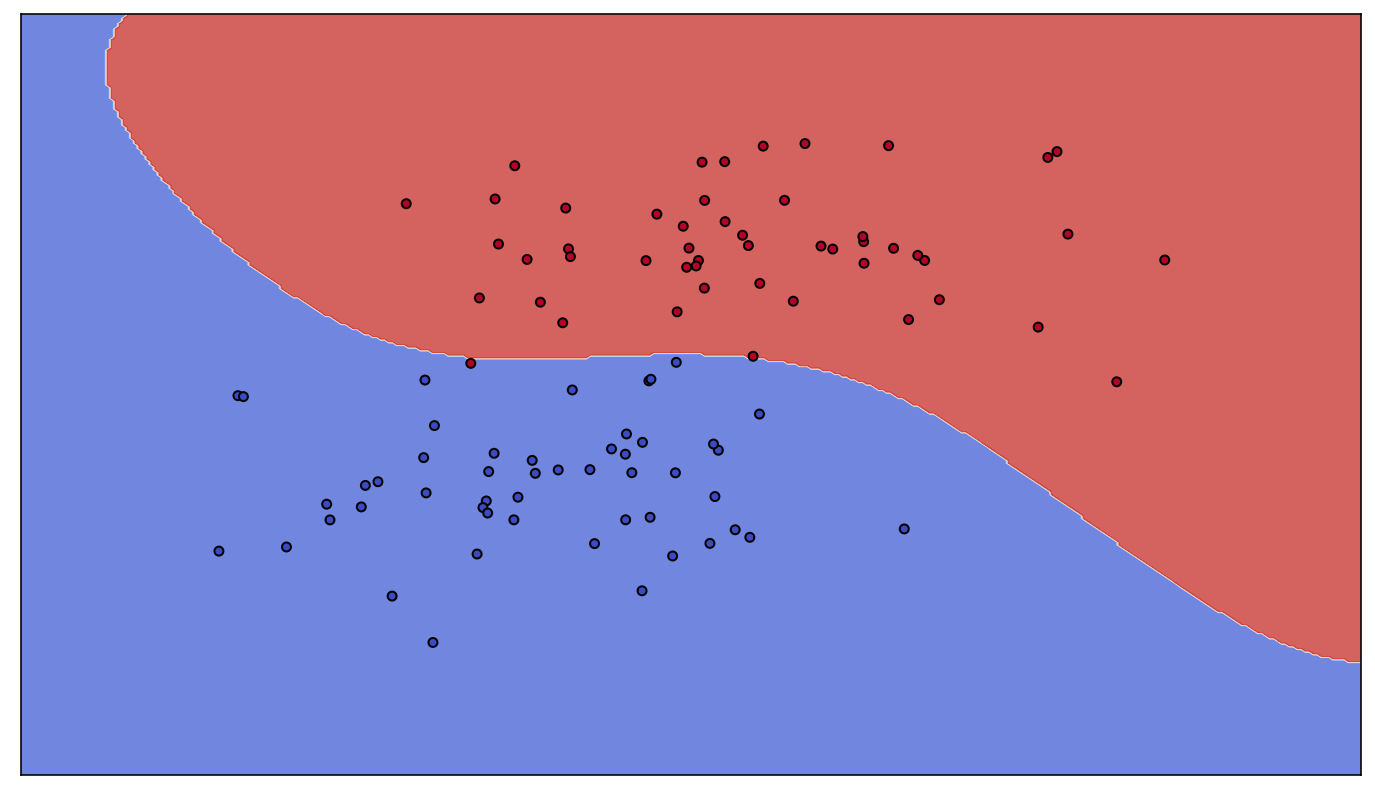

In [6]:
model = SVC(kernel="rbf")  
clf = model.fit(X, y)
plot_model(clf,X)    


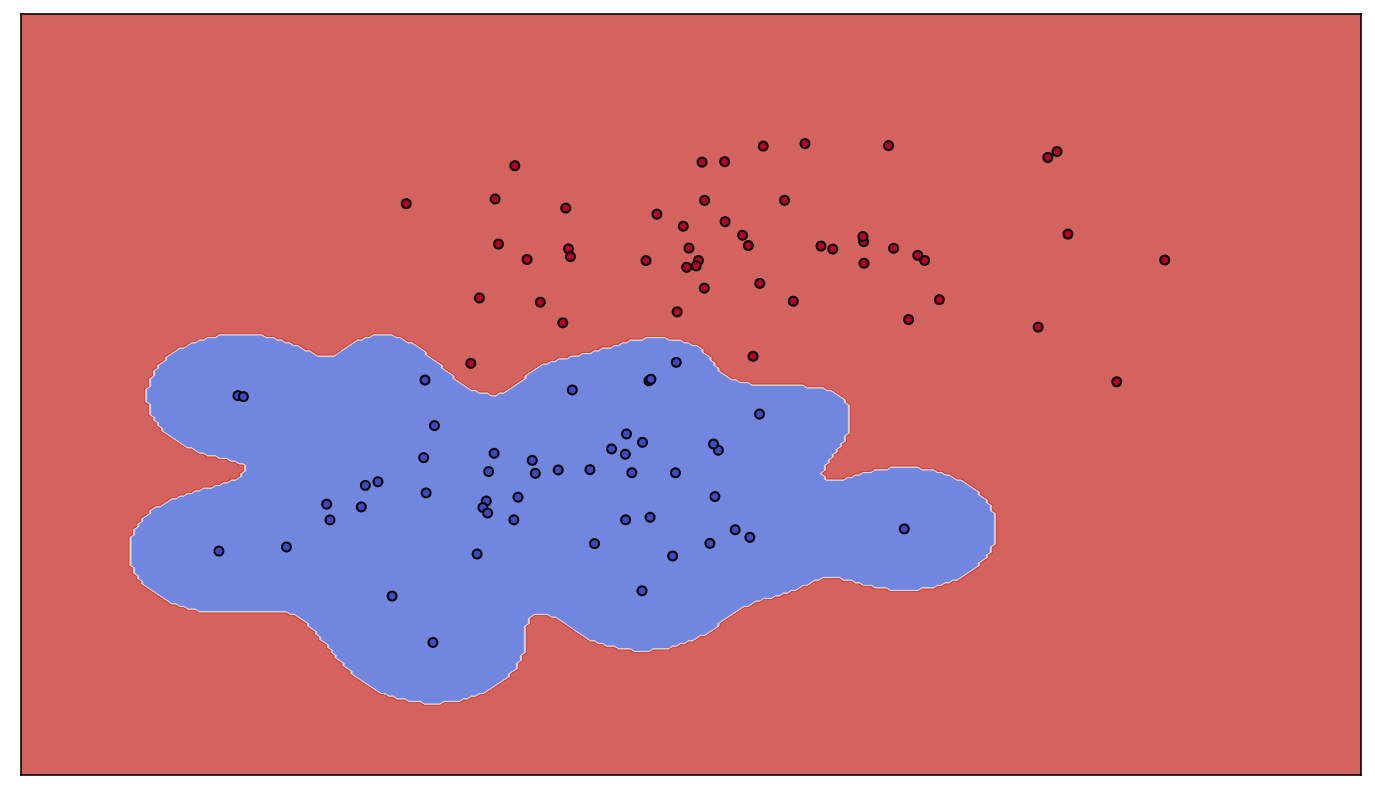

In [7]:
model = SVC(kernel="rbf",gamma=12)  
clf = model.fit(X, y)
plot_model(clf,X)    

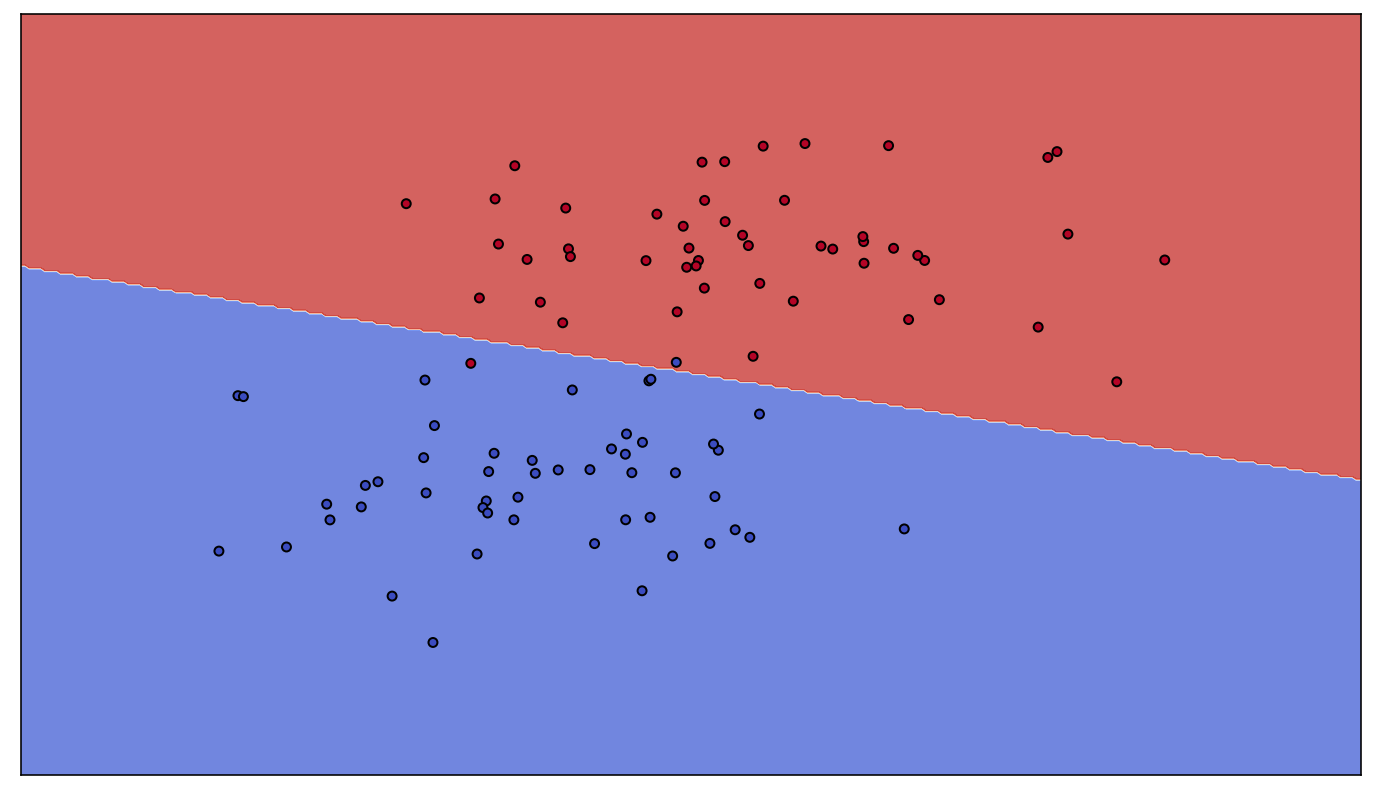

In [8]:
model = SVC(kernel="linear")  
clf = model.fit(X, y)
plot_model(clf,X)  

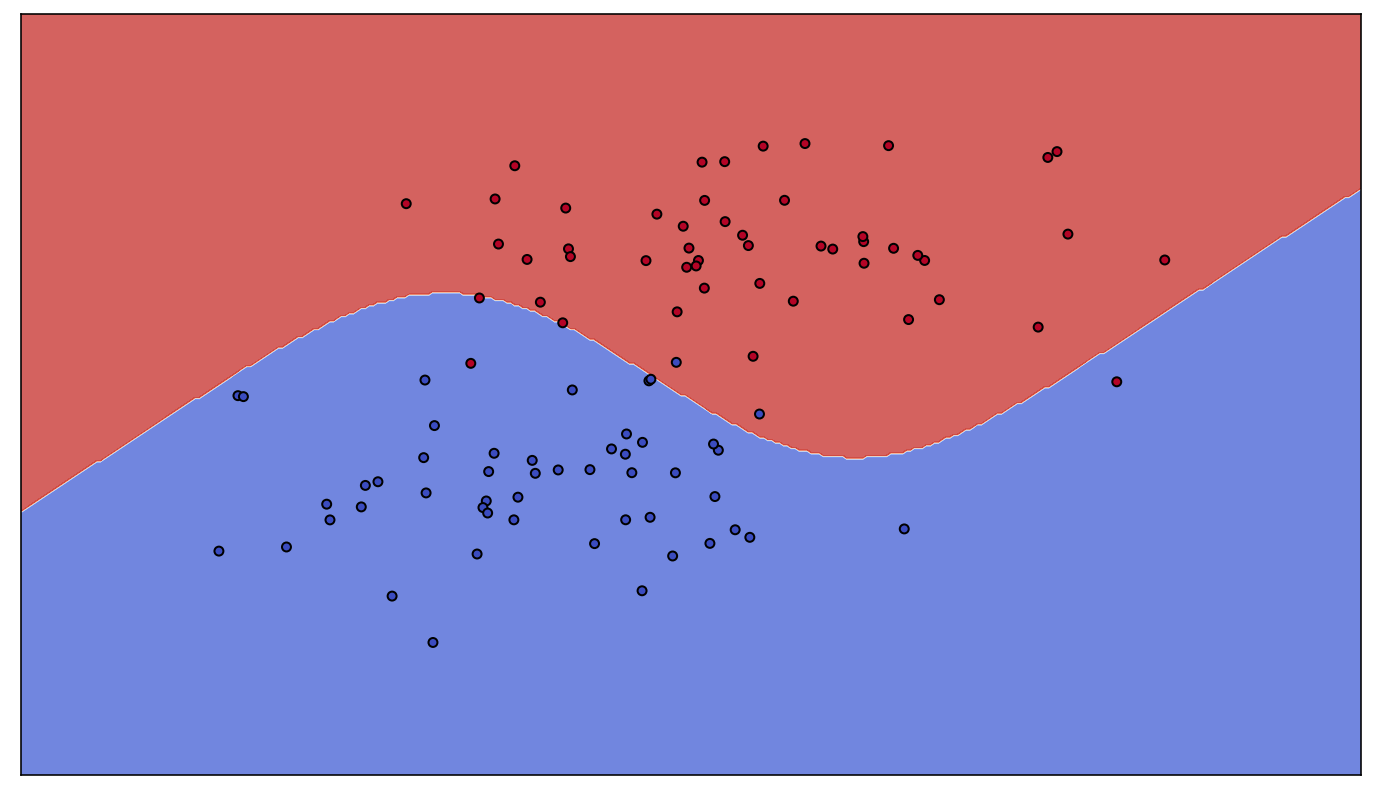

In [9]:
model = SVC(kernel="sigmoid")  
clf = model.fit(X, y)
plot_model(clf,X)  

### The end

If you want to know a little more, these are good slides:

https://svivek.com/teaching/lectures/slides/svm/kernels.pdf

Much of this material was adapted from *Hands-On Machine Learning with Scikit-Learn and TensorFlow* by Géron.